In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False
# from google.colab import drive
# path = '/content/drive/MyDrive/Tacademy/tensorflow/data'

In [4]:
df = pd.read_csv('ddata/pima-indians-diabetes.data.csv')

In [6]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,[-1]].values

In [5]:
# 1. 정규화

In [7]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)

In [8]:
x = tf.constant(x_scaled, tf.float32)
y = tf.constant(y_data, tf.float32)

In [10]:
x.shape

TensorShape([768, 8])

In [11]:
initX =tf.initializers.GlorotUniform()

w = tf.Variable( initX(shape=[x.shape[1],1]))
b = tf.Variable( initX(shape=[1]))

In [12]:
def compute_loss():
    z = tf.matmul(x, w) + b
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = z) # sum(y*-log(y^) + (1-y)*-log(1-y^))
    cost = tf.reduce_mean(cost_i) # binary cross entropy 값
    return cost

In [13]:
optimizer = Adam(0.3)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    if i%100 == 0:
        print(i, "cost: ", compute_loss().numpy())

0 cost:  0.7164704
100 cost:  0.48087558
200 cost:  0.4713306
300 cost:  0.47099853
400 cost:  0.47099313
500 cost:  0.47099307
600 cost:  0.47099313
700 cost:  0.47099316
800 cost:  0.47099313
900 cost:  0.47099313


In [14]:
def hxfn(xdata):
    xd = tf.constant(xdata, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>=0.5) + 0 

In [12]:
# 2. 6,148,72,35,0,33.6,0.627,50 당뇨유무 판별

In [13]:
test = [[6,148,72,35,0,33.6,0.627,50]]
test = scaler.transform(test)
hxfn(test)

array([[1]])

In [14]:
# 3. confusion matrix, 정확도, f1 score

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [17]:
pred = hxfn(x_scaled)
pred

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [18]:
confusion = confusion_matrix( y_data, pred)
confusion

array([[445,  55],
       [112, 156]], dtype=int64)

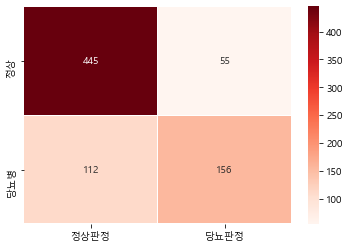

In [28]:
sns.heatmap( confusion, annot=True, fmt='d', linewidths=0.2, cmap='Reds',
           xticklabels=['정상판정','당뇨판정'], yticklabels=['정상','당뇨병'] )
plt.show()

In [30]:
accuracy = accuracy_score(y_data, pred)
accuracy

0.7825520833333334

In [31]:
f1 = f1_score( y_data, pred)
f1

0.651356993736952